# 0. Meta

## 0.1. Packages

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd


## 0.2. Functions

In [16]:
# Funktion, um Werte in Float zu konvertieren und Fehler abzufangen
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        print(f"Konvertierungsfehler bei: {value}")
        return None

# 1. Data import

In [17]:
file_path = r"C:\Sync\03_projects\data_science\projects\weddingsurvey\Hochzeitsgäste_im_Check.csv"

In [18]:
df = pd.read_csv(file_path)

In [19]:
df.head()

,Teilnehmer,Startzeit,Endzeit,Quelle,Wie alt bist du?,Mit welchem Geschlecht identifizierst du dich?,In welchem Land bist du geboren?,Wie lautet die Postleitzahl (PLZ) deines Wohnortes?,Wie ist dein Familienstand?,Wie viele Kinder hast du?,...,Wer fährt besser Fahrrad nach dem Biergartenbesuch? (Lucas),Wer hat mehr Narben? (Lena),Wer hat mehr Narben? (Lucas),Wer hat nach einem Tag in der Sonne eher die Hautfarbe eines Hummers? (Lena),Wer hat nach einem Tag in der Sonne eher die Hautfarbe eines Hummers? (Lucas),"Welchen Nachnamen soll das Brautpaar wählen, wenn es nach dir geht?",Wer verbringt mehr Zeit am Handy? (Lena),Wer verbringt mehr Zeit am Handy? (Lucas),Wer ist romantischer? (Lena),Wer ist romantischer? (Lucas)
0,1,05.08.2024 08:00:04,05.08.2024 08:03:20,Direkter Link,57,Frau,DE,67435,Verheiratet,5,...,übersprungen,0,1,1,1,Beide sollen ihren aktuellen Nachnamen behalten,1,0,0,1
1,2,05.08.2024 15:03:31,05.08.2024 15:06:48,Direkter Link,34,Mann,Deutschland,67434,Liiert,0,...,1,1,0,1,0,Wallbert-Almann,1,1,0,1
2,3,06.08.2024 13:10:35,06.08.2024 13:16:05,Direkter Link,30,Mann,Deutschland,20099,Liiert,0,...,0,0,1,1,0,Albert-Wallmann,1,0,1,0
3,4,06.08.2024 14:03:29,06.08.2024 14:08:22,Direkter Link,28,Frau,Deutschland,64293,Verheiratet,2,...,1,0,1,1,0,Almann-Wallbert,1,0,0,1
4,5,06.08.2024 14:29:37,06.08.2024 14:38:57,Direkter Link,31,Mann,Deutschland,64293,Verheiratet,2,...,1,0,1,1,0,Albert-Wallmann,1,0,0,1


# 2. Data cleaning

## 2.1 Wie alt bist du?

In [20]:
df['Wie alt bist du? (float)'] = df['Wie alt bist du?'].apply(convert_to_float)
invalid_entries = df[df['Wie alt bist du? (float)'].isnull()]['Wie alt bist du?']
invalid_entries

Konvertierungsfehler bei: Too good to go
Konvertierungsfehler bei: 78 Jahre 


11    Too good to go
46         78 Jahre 
Name: Wie alt bist du?, dtype: object

In [21]:
# Ersetze den ersten ungültigen Eintrag mit NaN
df.loc[invalid_entries.index[0], 'Wie alt bist du?'] = np.nan

# Ersetze den zweiten ungültigen Eintrag mit 78
df.loc[invalid_entries.index[1], 'Wie alt bist du?'] = 78

In [22]:
# Konvertierung in float vornehmen
df['Wie alt bist du? (float)'] = df['Wie alt bist du?'].apply(convert_to_float)

# Überprüfen, ob die Änderungen korrekt sind
df[['Wie alt bist du?', 'Wie alt bist du? (float)']].loc[invalid_entries.index]

,Wie alt bist du?,Wie alt bist du? (float)
11,NaN,NaN
46,78,78.0


In [23]:
# Berechnung der statistischen Kennzahlen für die Altersvariable
summary_stats = {
    'Min': df['Wie alt bist du? (float)'].min(),
    'Max': df['Wie alt bist du? (float)'].max(),
    'Mean': df['Wie alt bist du? (float)'].mean(),
    'SD': df['Wie alt bist du? (float)'].std()
}

print("Zusammenfassung der Altersdaten:")
summary_stats

Zusammenfassung der Altersdaten:


{'Min': np.float64(21.0),
 'Max': np.float64(80.0),
 'Mean': np.float64(36.224489795918366),
 'SD': np.float64(13.50503811256261)}

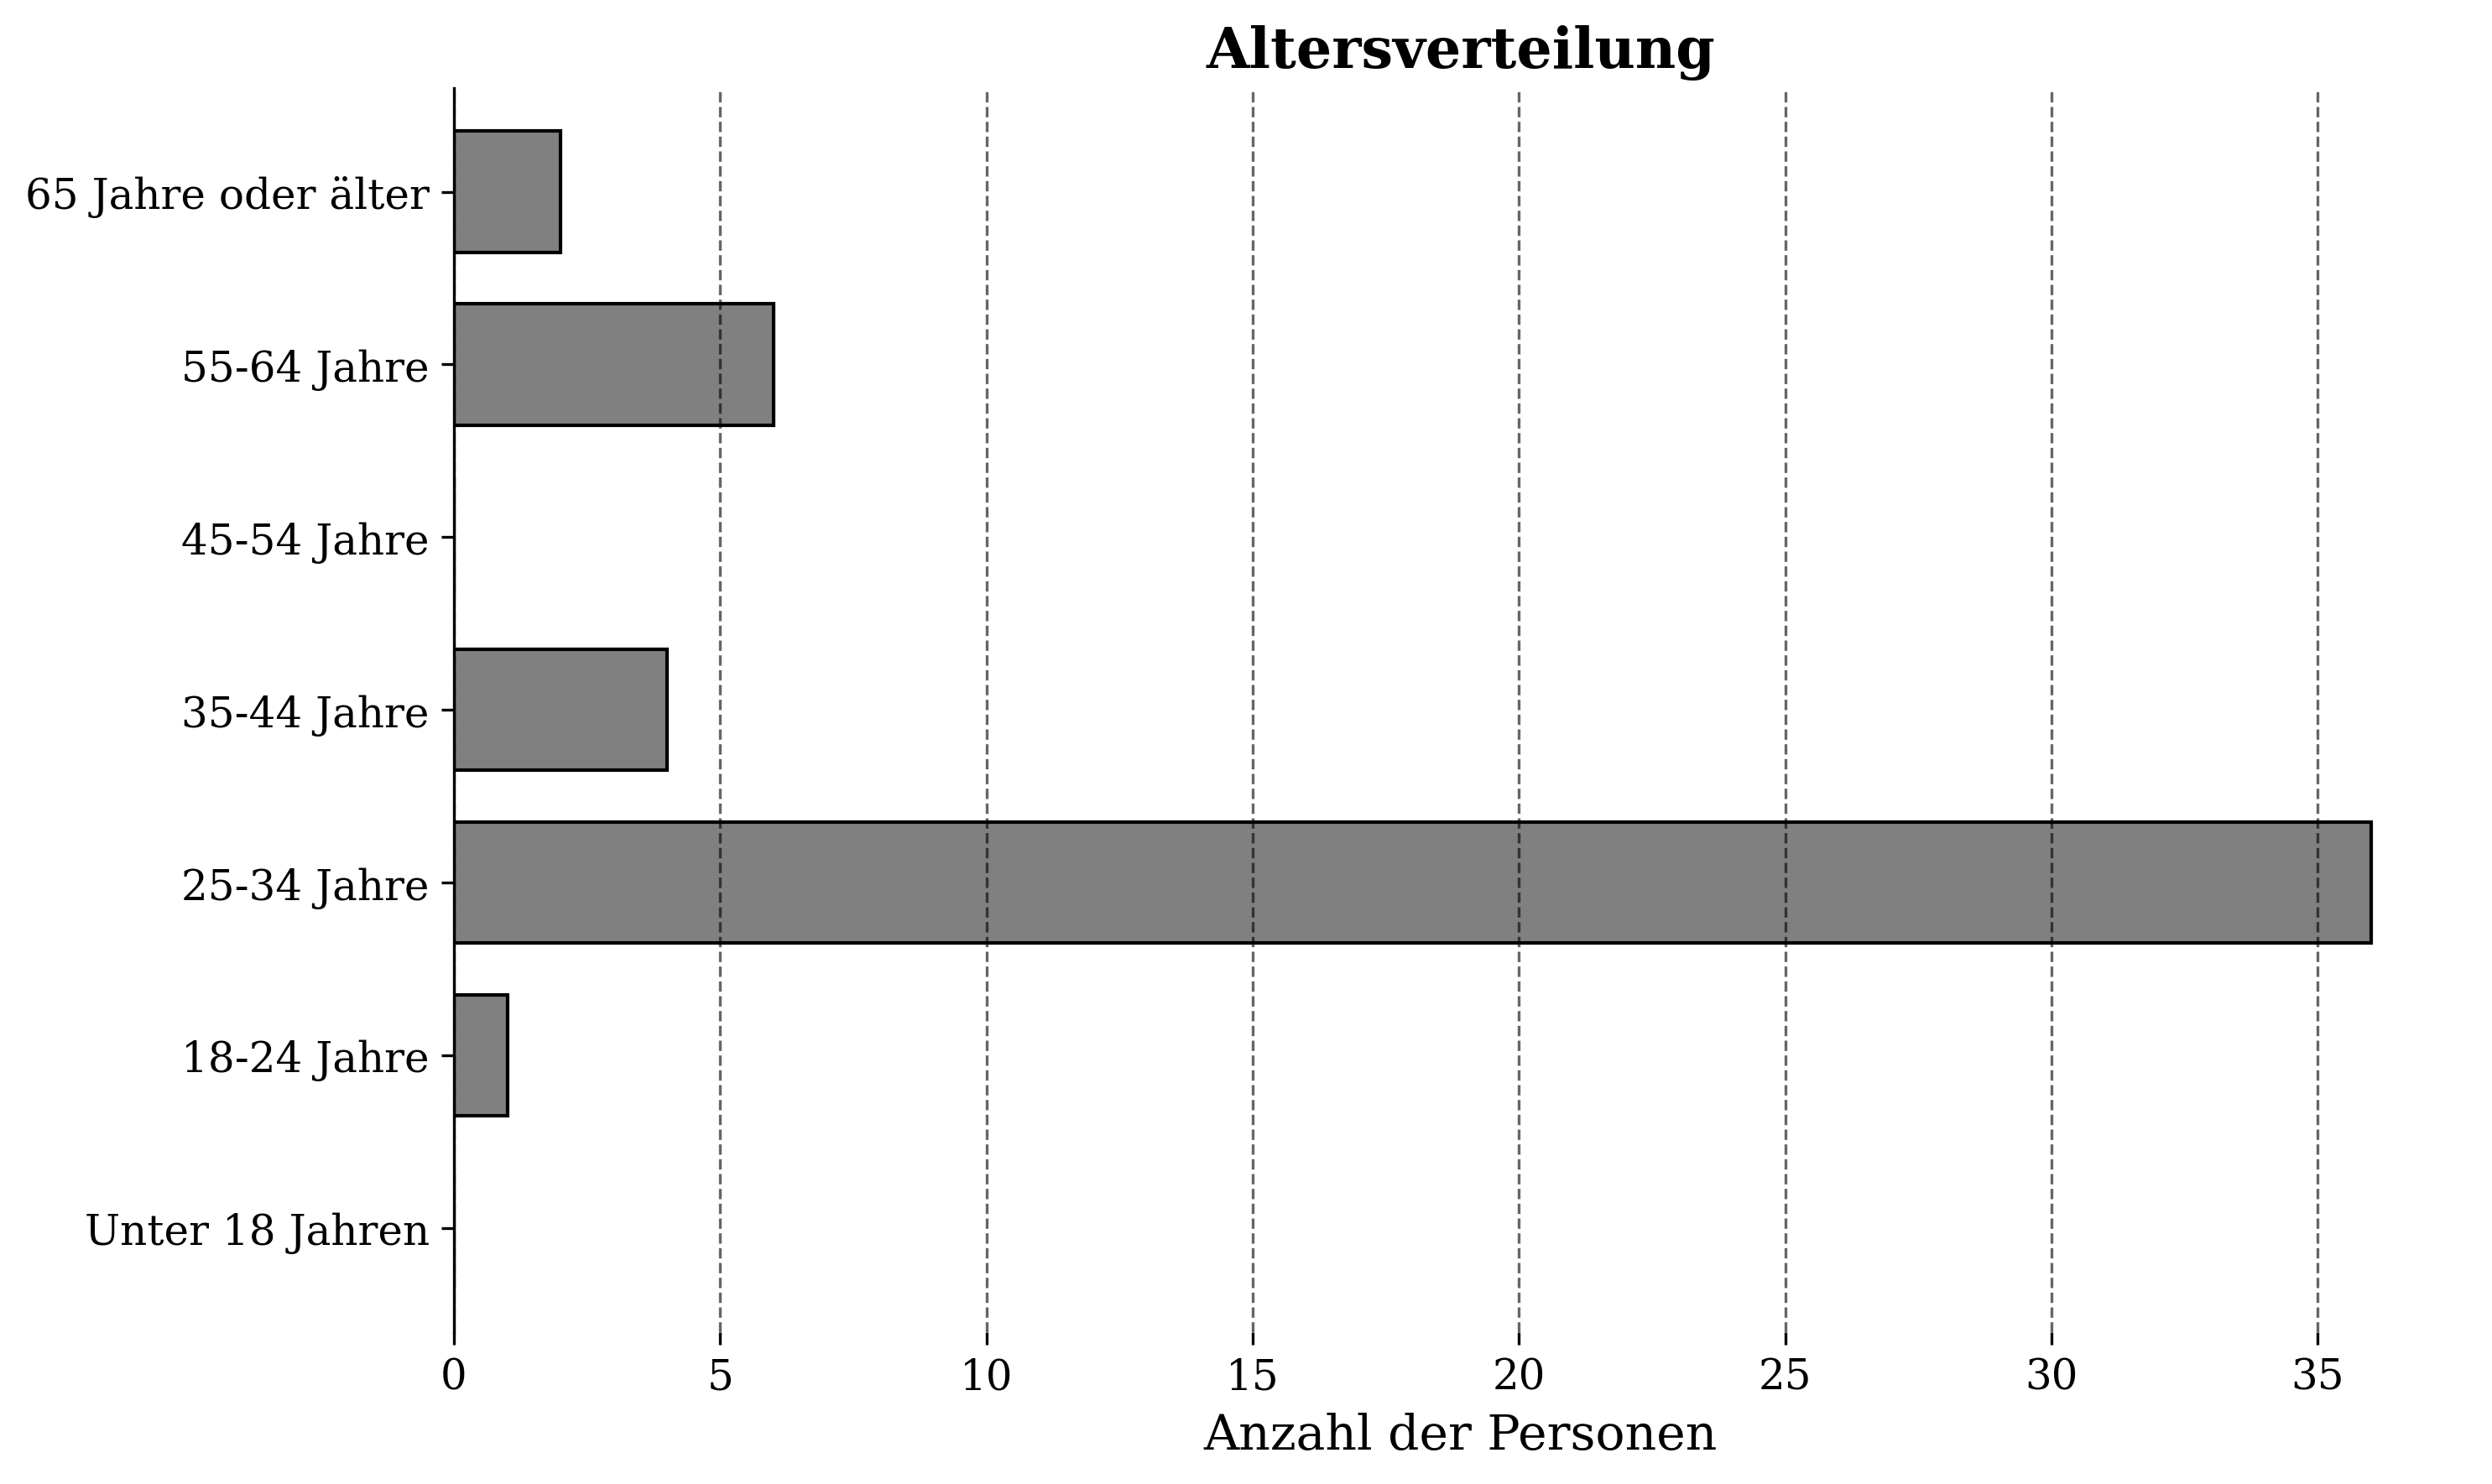

In [24]:
# Definiere die Bins und Labels für die Altersgruppen
bins = [0, 18, 25, 35, 45, 55, 65, float('inf')]
labels = ['Unter 18 Jahren', '18-24 Jahre', '25-34 Jahre', '35-44 Jahre', '45-54 Jahre', '55-64 Jahre', '65 Jahre oder älter']

# Verwende pd.cut, um die Altersgruppen ohne neue Spalte zu erstellen und direkt zu zählen
age_group_counts = pd.cut(df['Wie alt bist du? (float)'], bins=bins, labels=labels, right=False).value_counts(sort=False)

# Erstelle das horizontale Balkendiagramm der Altersgruppen
plt.figure(figsize=(10, 6), dpi=300)
age_group_counts = pd.cut(df['Wie alt bist du? (float)'], bins=bins, labels=labels, right=False).value_counts(sort=False)
age_group_counts.plot(kind='barh', color='gray', edgecolor='black', width=0.7)  # Verkleinere den Abstand zwischen den Balken durch Setzen der Breite
plt.title('Altersverteilung', fontsize=16, fontweight='bold', family='serif')
plt.xlabel('Anzahl der Personen', fontsize=14, family='serif')
plt.xticks(fontsize=12, family='serif')
plt.yticks(fontsize=12, family='serif')
plt.grid(axis='x', linestyle='--', alpha=0.6, color='black')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.ylabel('')  # Entfernt das y-Label
plt.tight_layout()  # Optimiert den Layout-Abstand
plt.show()

## 2.2 Mit welchem Geschlecht identifizierst du dich?

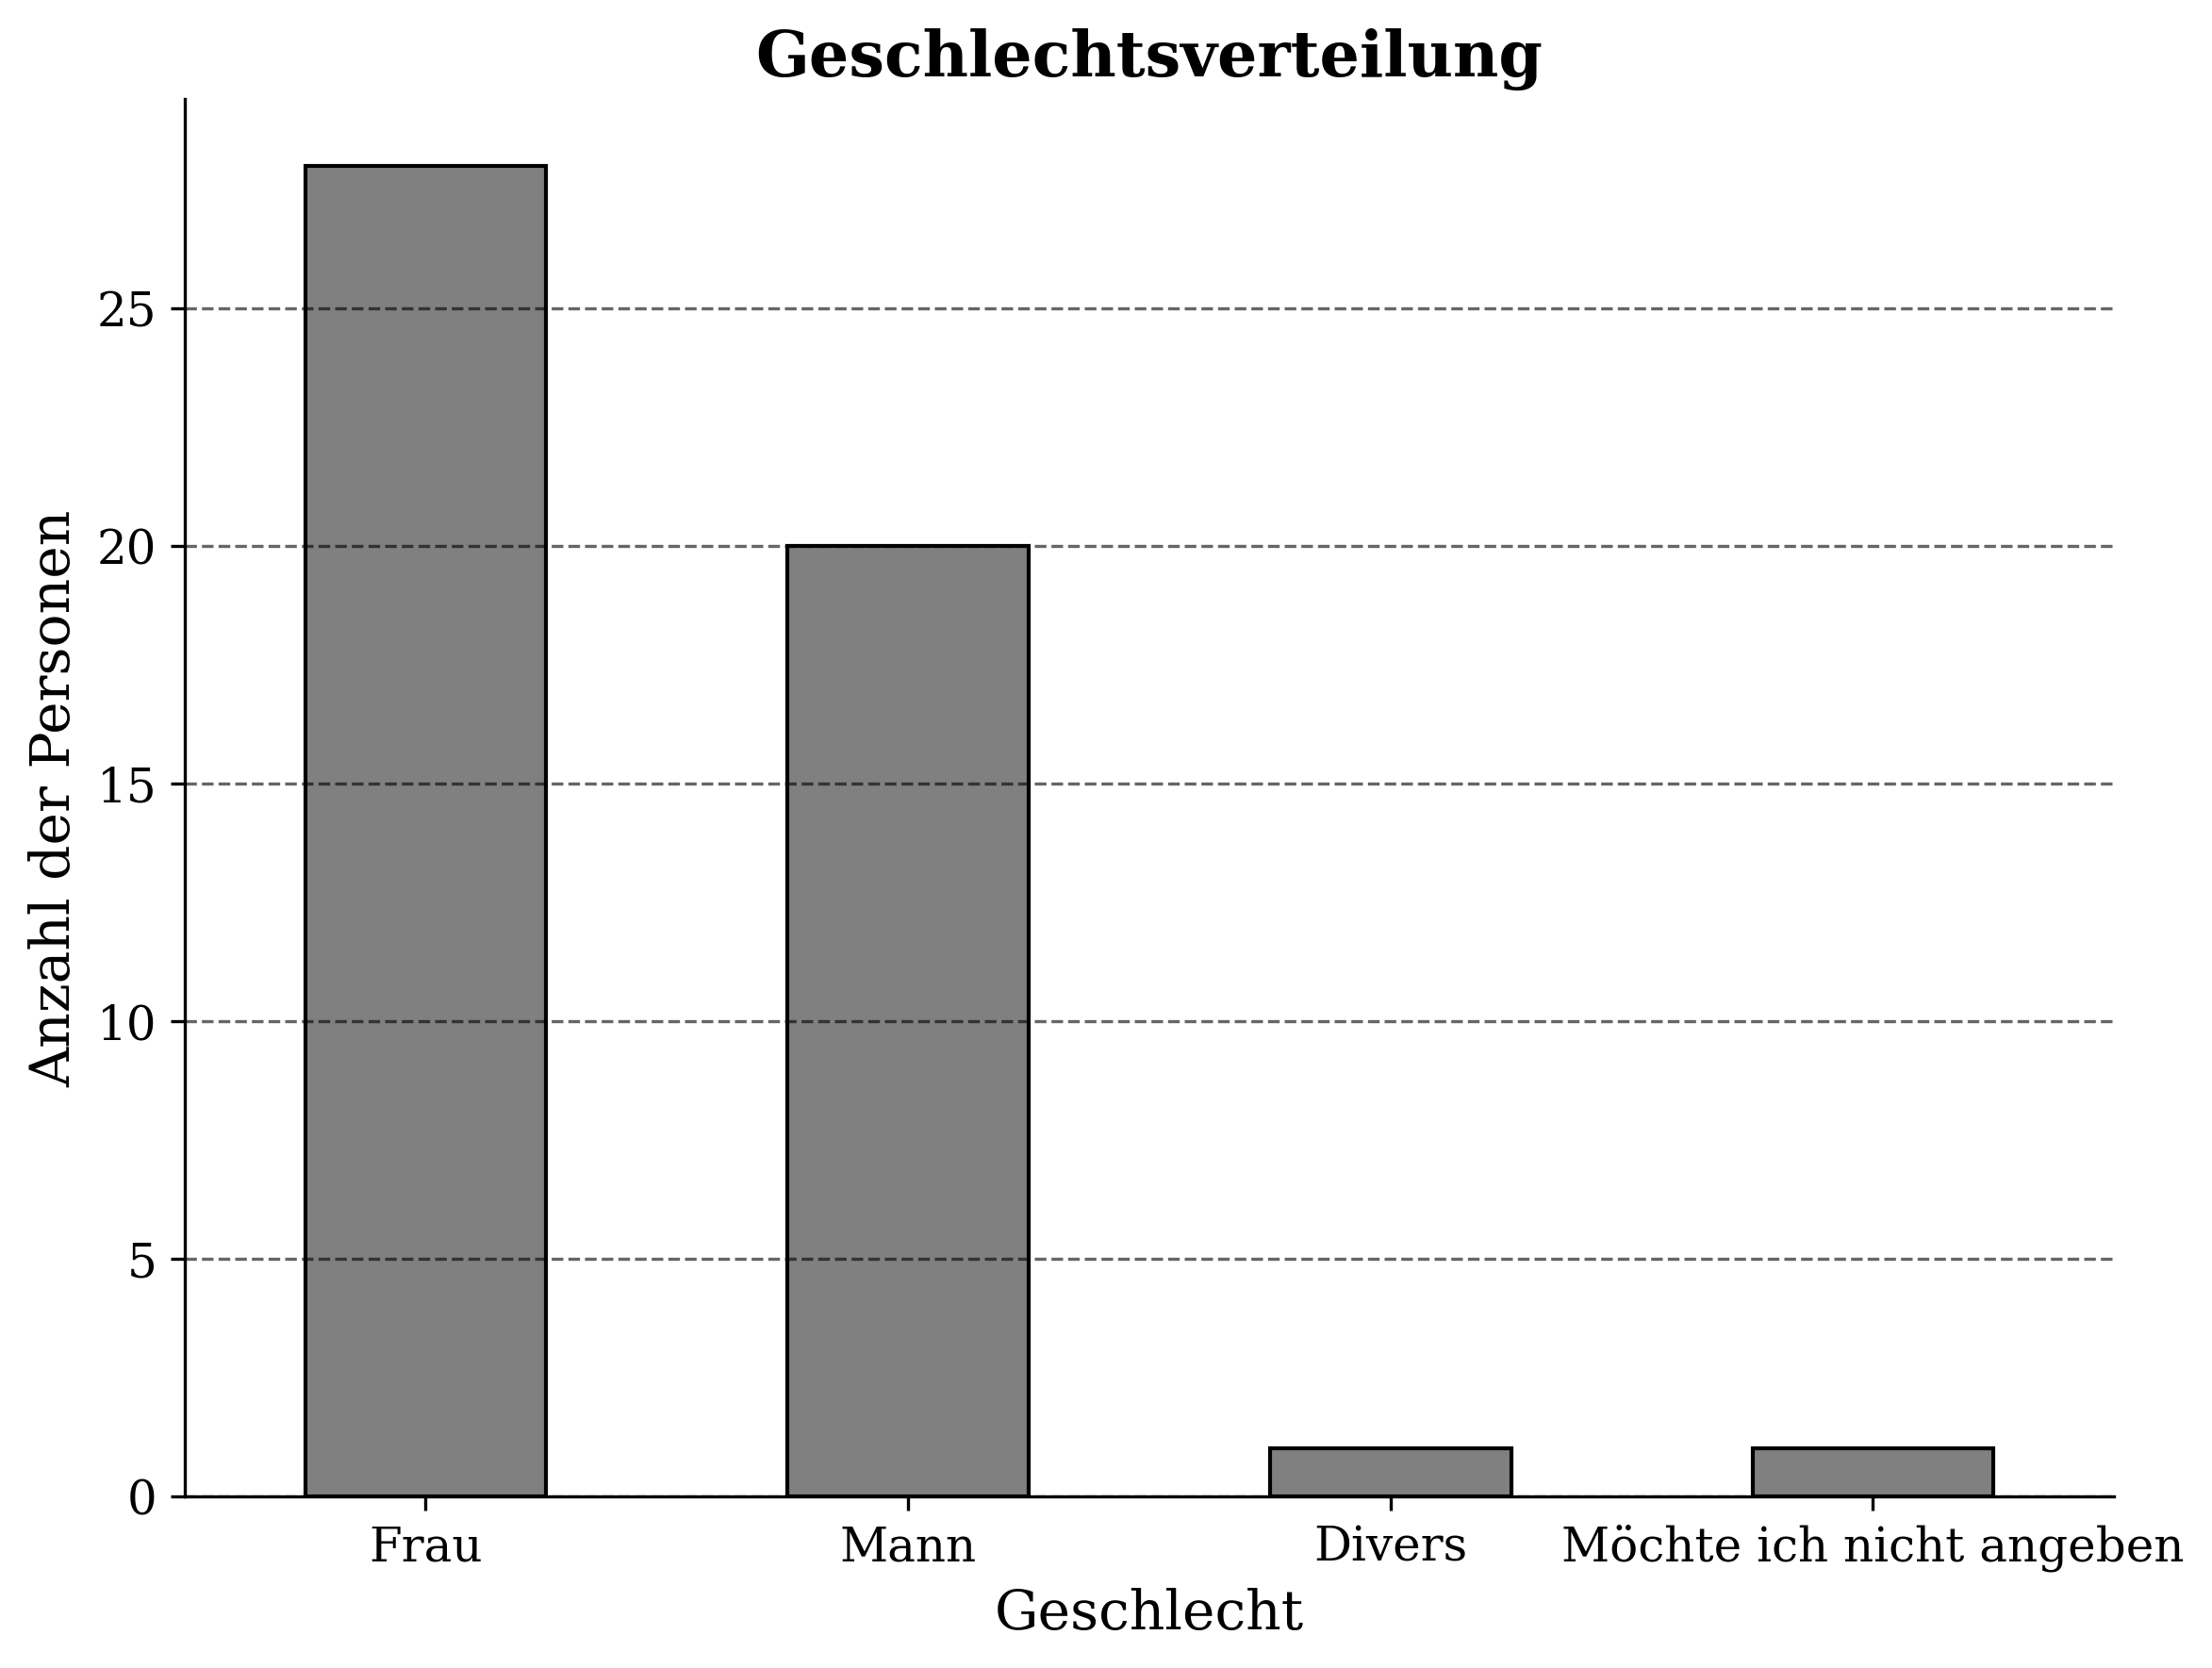

In [25]:
# Berechne die Häufigkeit der Antworten
gender_counts = df['Mit welchem Geschlecht identifizierst du dich?'].value_counts()

# Erstelle ein Balkendiagramm der Geschlechtsverteilung
plt.figure(figsize=(8, 6), dpi=300)
gender_counts.plot(kind='bar', color='gray', edgecolor='black')
plt.title('Geschlechtsverteilung', fontsize=16, fontweight='bold', family='serif')
plt.xlabel('Geschlecht', fontsize=14, family='serif')
plt.ylabel('Anzahl der Personen', fontsize=14, family='serif')
plt.xticks(rotation=0, fontsize=12, family='serif')
plt.yticks(fontsize=12, family='serif')
plt.grid(axis='y', linestyle='--', alpha=0.6, color='black')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()  # Optimiert den Layout-Abstand
plt.show()

## 2.3. In welchem Land bist du geboren?

In [26]:
# Berechnung der Häufigkeit der Antworten auf die offene Frage
country_counts = df['In welchem Land bist du geboren?'].value_counts()

# Anzeigen der Einträge und ihrer Häufigkeiten
print(country_counts)

In welchem Land bist du geboren?
Deutschland     25
Deutschland     17
DE               1
Sauerland        1
Bangladesch      1
Pfalz            1
Russland         1
Afghanistan      1
Germany          1
DE               1
Name: count, dtype: int64


In [27]:
# Entferne führende und nachfolgende Leerzeichen in der Spalte
df['In welchem Land bist du geboren?'] = df['In welchem Land bist du geboren?'].str.strip()

# Definiere die Einträge, die zusammengeführt werden sollen
to_merge = ["Deutschland", "DE", "Sauerland", "Pfalz", "Germany"]

# Ersetze diese Einträge durch "Deutschland"
df['In welchem Land bist du geboren?'] = df['In welchem Land bist du geboren?'].replace(to_merge, "Deutschland")

# Überprüfe das Ergebnis der Zusammenführung
country_counts = df['In welchem Land bist du geboren?'].value_counts()
print(country_counts)


In welchem Land bist du geboren?
Deutschland    47
Bangladesch     1
Russland        1
Afghanistan     1
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5700\2333373811.py:38: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5700\2333373811.py:38: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5700\2333373811.py:38: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5700\2333373811.py:38: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS befor

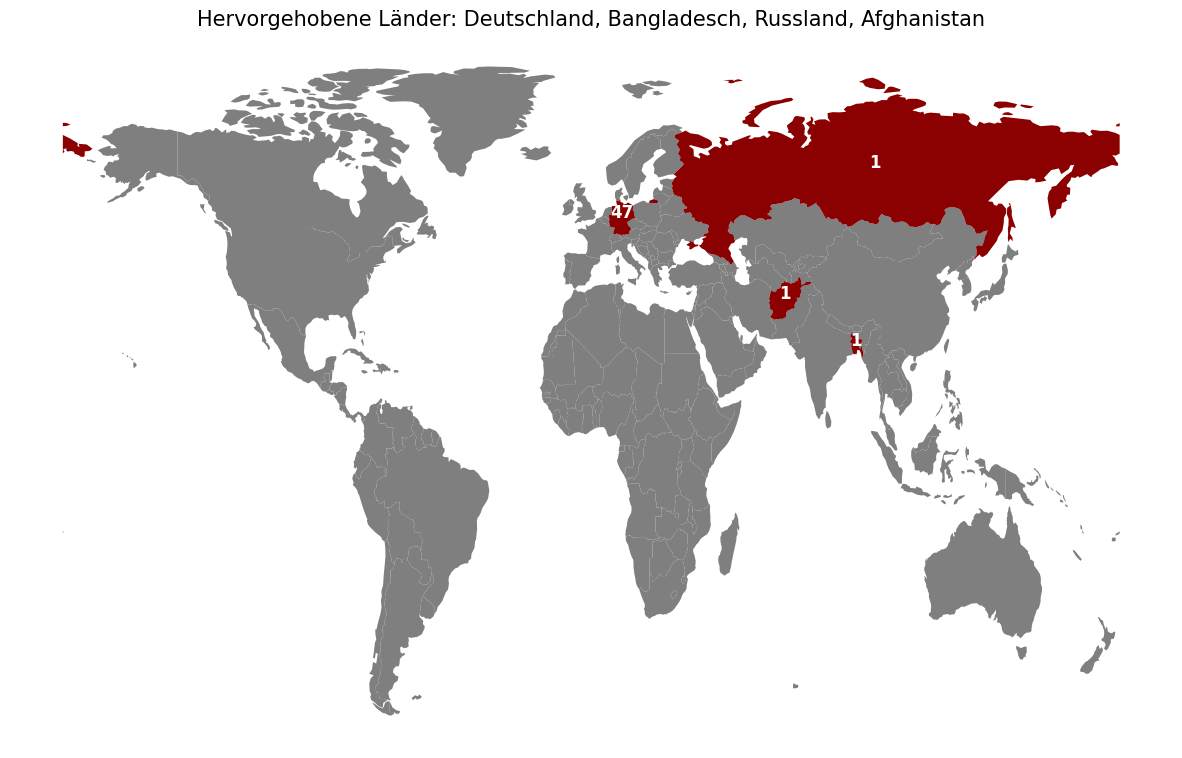

In [46]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Pfad zur heruntergeladenen und entpackten .shp Datei
shapefile_path = r"C:\Sync\03_projects\data_science\projects\weddingsurvey\geopandas_maps\ne_110m_admin_0_countries.shp"

# Weltkarte laden
world = gpd.read_file(shapefile_path)

# Entferne die Antarktis aus dem GeoDataFrame
world = world[world['NAME'] != 'Antarctica']

# Liste der Länder, die eingefärbt werden sollen, und ihre Zähler
highlight_countries = {
    'Germany': 47,
    'Bangladesh': 1,
    'Russia': 1,
    'Afghanistan': 1
}

# Erstelle eine Spalte, die festlegt, ob ein Land hervorgehoben wird
world['highlight'] = world['NAME'].apply(lambda x: 'Highlighted' if x in highlight_countries else 'Other')

# Plotten der Weltkarte
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Andere Länder in einem dunkleren Grau einfärben
world[world['highlight'] == 'Other'].plot(ax=ax, color='#7f7f7f')  # Dunkleres Grau

# Hervorgehobene Länder einfärben
highlighted = world[world['highlight'] == 'Highlighted']
highlighted.plot(ax=ax, color='darkred')

# Länderzähler in Weiß hinzufügen
for country, count in highlight_countries.items():
    country_geometry = highlighted[highlighted['NAME'] == country].geometry
    if not country_geometry.empty:
        x, y = country_geometry.centroid.x.values[0], country_geometry.centroid.y.values[0]
        ax.annotate(text=str(count), xy=(x, y), color='white', fontsize=12, ha='center', weight='bold')

# Titel und Achsen entfernen für eine saubere Darstellung
ax.set_title('Hervorgehobene Länder: Deutschland, Bangladesch, Russland, Afghanistan', fontsize=15)
ax.set_axis_off()

plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5700\47677015.py:35: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5700\47677015.py:35: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5700\47677015.py:35: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5700\47677015.py:35: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this o

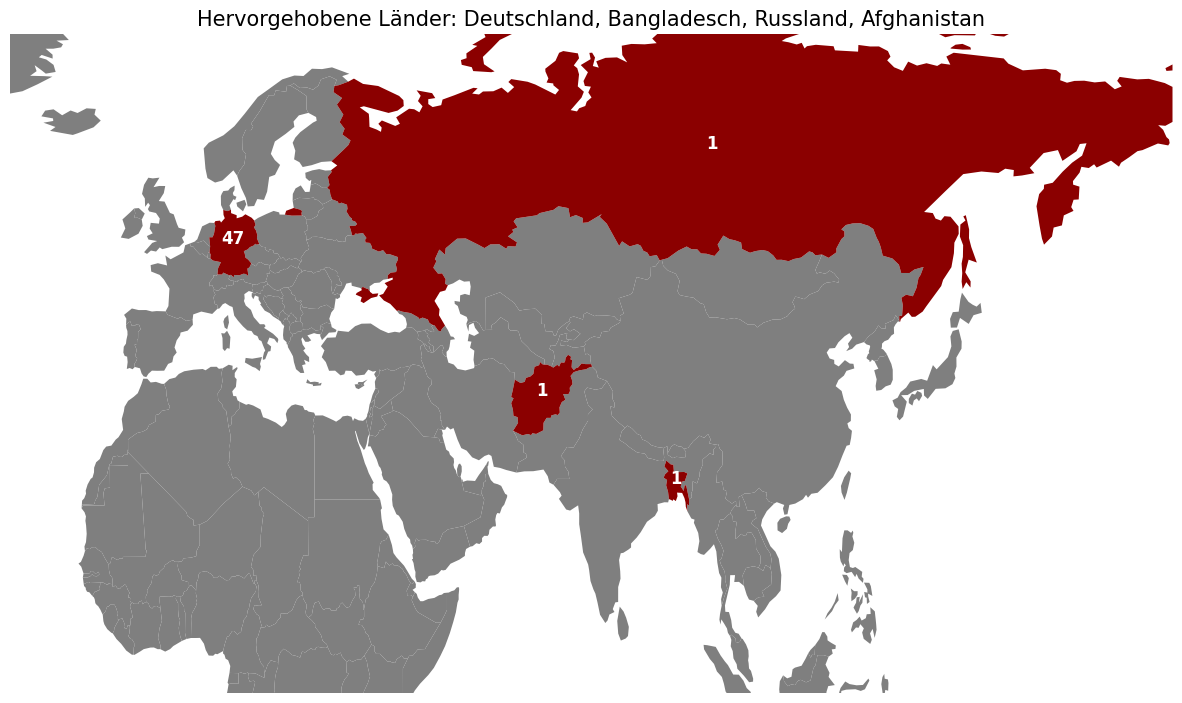

In [45]:
# Pfad zur heruntergeladenen und entpackten .shp Datei
shapefile_path = r"C:\Sync\03_projects\data_science\projects\weddingsurvey\geopandas_maps\ne_110m_admin_0_countries.shp"

# Weltkarte laden
world = gpd.read_file(shapefile_path)

# Entferne die Antarktis aus dem GeoDataFrame
world = world[world['NAME'] != 'Antarctica']

# Liste der Länder, die eingefärbt werden sollen, und ihre Zähler
highlight_countries = {
    'Germany': 47,
    'Bangladesh': 1,
    'Russia': 1,
    'Afghanistan': 1
}

# Erstelle eine Spalte, die festlegt, ob ein Land hervorgehoben wird
world['highlight'] = world['NAME'].apply(lambda x: 'Highlighted' if x in highlight_countries else 'Other')

# Plotten der Weltkarte
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Andere Länder in einem dunkleren Grau einfärben
world[world['highlight'] == 'Other'].plot(ax=ax, color='#7f7f7f')  # Dunkleres Grau

# Hervorgehobene Länder einfärben
highlighted = world[world['highlight'] == 'Highlighted']
highlighted.plot(ax=ax, color='darkred')

# Länderzähler in Weiß hinzufügen
for country, count in highlight_countries.items():
    country_geometry = highlighted[highlighted['NAME'] == country].geometry
    if not country_geometry.empty:
        x, y = country_geometry.centroid.x.values[0], country_geometry.centroid.y.values[0]
        ax.annotate(text=str(count), xy=(x, y), color='white', fontsize=12, ha='center', weight='bold')

# Titel und Achsen entfernen für eine saubere Darstellung
ax.set_title('Hervorgehobene Länder: Deutschland, Bangladesch, Russland, Afghanistan', fontsize=15)
ax.set_axis_off()

# Setzen der Grenzen für den Fokus auf Europa und Umgebung
ax.set_xlim([-30, 180])  # Begrenzung für die x-Achse (links von Europa bis Asien)
ax.set_ylim([0, 75])    # Begrenzung für die y-Achse (oberhalb Afghanistans)

plt.show()